In [1]:
using Plots, DynamicalSystemsBase, ChaosTools

  1.139789 seconds (1.36 M allocations: 68.227 MiB, 1.24% gc time)


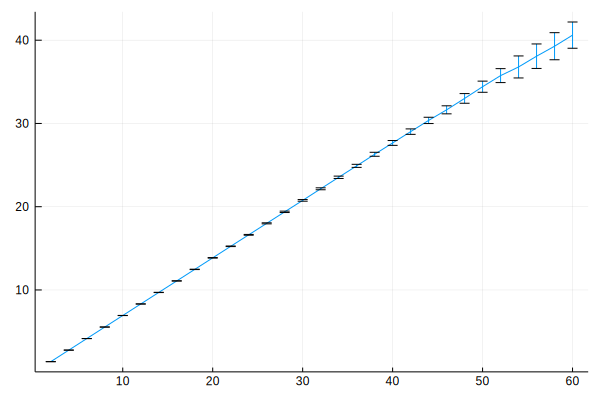

In [2]:
# Modified tent map. This replicates Example B in Hunt and Ott.
tent_eom(x, p, n) = (x < -0.2 ? -0.6 : (x < 0.4 ? 3x : 2(1-x)))
tent_jacob(x, p, n) = (x < -0.2 ? 0 : (x < 0.4 ? 3 : -2))
tent = DiscreteDynamicalSystem(tent_eom, 0.2, nothing, tent_jacob)
@time times, tent_meanlist, tent_stdlist = expansionentropy_graph(tent, rand, x->0<x<1; 
    batchcount=100, samplecount=100000, steps=30, dT=2)
plot(times, tent_meanlist, yerr=tent_stdlist, leg=false)

 19.653549 seconds (100.35 M allocations: 12.864 GiB, 13.85% gc time)


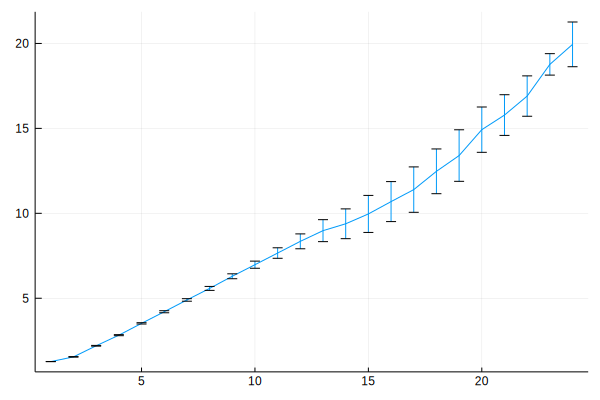

In [3]:
henon_iip = Systems.henon_iip(zeros(2); a = 4.2, b = 0.3)
henon_gen() = rand(2).*6 .- 3
henon_isinside(x) = -3<x[1]<3 &&  -3<x[2]<3
@time times, meanlist, stdlist = expansionentropy_graph(henon_iip, henon_gen, henon_isinside; batchcount=100, samplecount=100000, steps=24)
plot(times, meanlist, yerr=stdlist, leg=false)

 14.205528 seconds (7.45 M allocations: 1.141 GiB, 2.35% gc time)


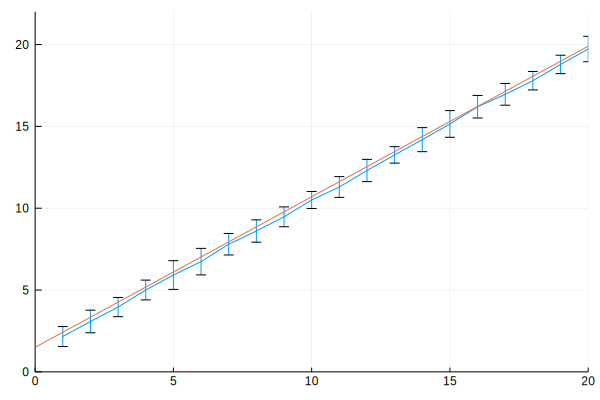

In [10]:
#=
The Lorenz attractor is roughly bounded within the box [-20, 20]×[-30, 30]×[0, 50]
As can be seen in the plot, the Lorentz attractor has an expansion entropy of
about 0.92
=#

lor = Systems.lorenz()
lor_gen() = [rand()*40-20, rand()*60-30, rand()*50]
lor_isinside(x) = -20 < x[1] < 20 && -30 < x[2] < 30 && 0 < x[3] < 50
@time times, meanlist, stdlist = expansionentropy_graph(lor, lor_gen, lor_isinside; batchcount=100, samplecount=100, steps=40, dT=1.0)
plot(times, meanlist, yerr=stdlist, leg=false)
plot!(x->0.92x+1.5, xlims=(0, 20), ylims=(0, 22))

  0.395740 seconds (245.00 k allocations: 12.118 MiB, 6.39% gc time)


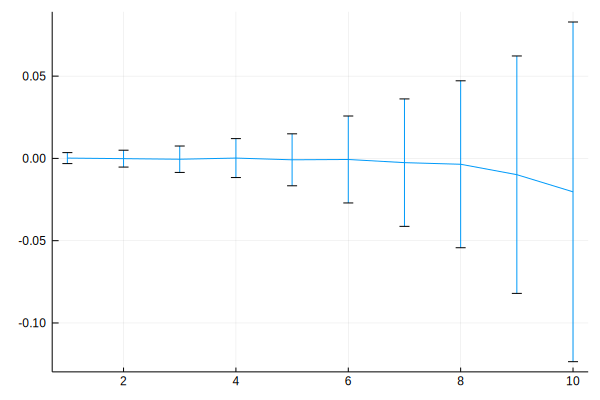

In [8]:
# Expand 2: is not chaotic, thus the plot should be a flat line.
expand2_eom(x, p, n) = 2x
expand2_jacob(x, p, n) = 2
expand2 = DiscreteDynamicalSystem(expand2_eom, 0.2, nothing, expand2_jacob)
@time times, meanlist, stdlist = expansionentropy_graph(expand2, rand, x -> 0 < x < 1; batchcount=100, samplecount=100000, steps=10)
plot(times, meanlist, yerr=stdlist, leg=false)

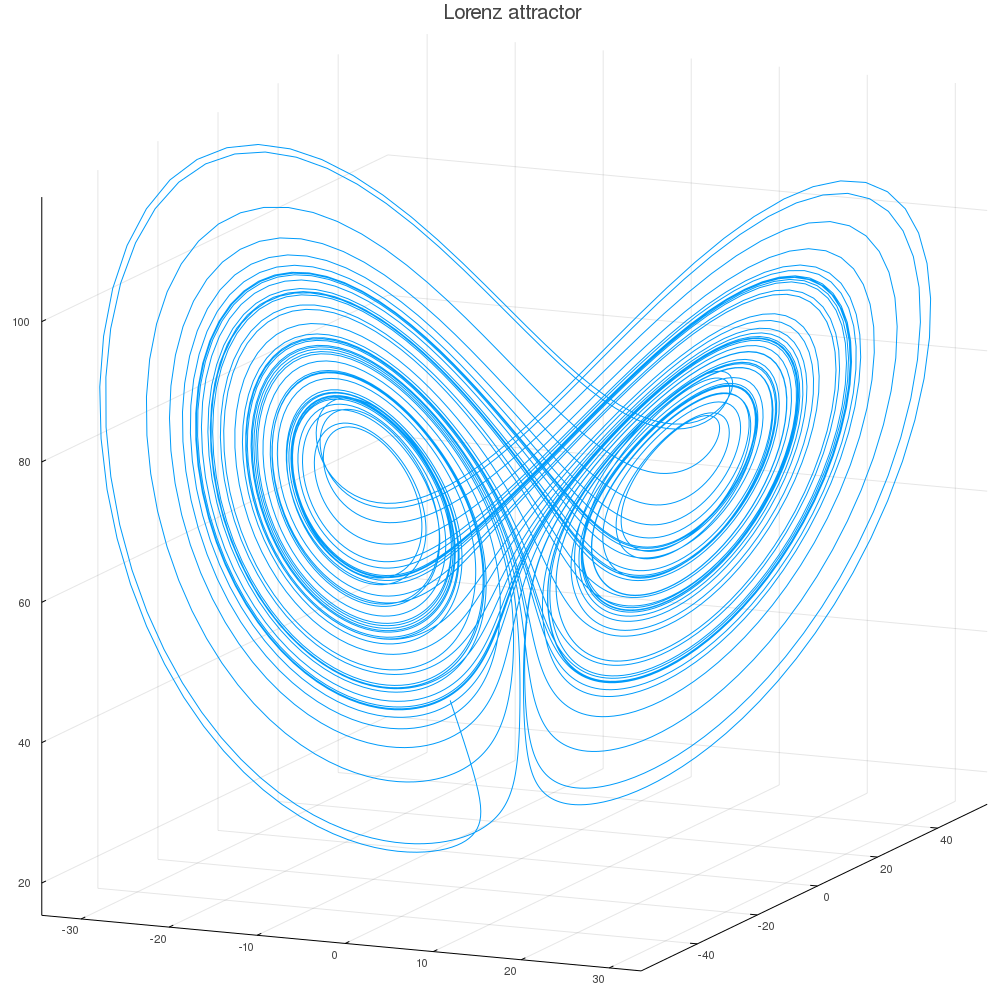

In [5]:
# Transient chaos can cause problems.

lor = Systems.lorenz(
    [-16.943553254756164, 25.930901961075335, 30.60965670087519 ]; ρ = 69.75)
tr = trajectory(lor, 40.0, dt = 0.005, Ttr = 0.0)

x, y, z = columns(tr)

plot(x,y,z,
        leg=false, title="Lorenz attractor", 
        html_output_format=:png, size=(1000,1000))

173.642451 seconds (58.99 M allocations: 14.301 GiB, 1.86% gc time)


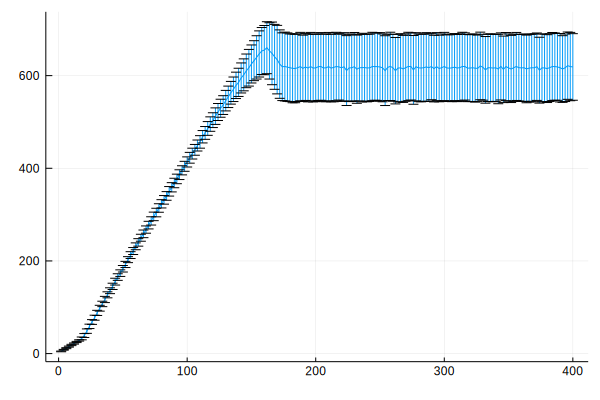

In [6]:
lor = Systems.lorenz(ρ=69.75)

tr = trajectory(lor, 100.0, dt = 0.005, Ttr = 0.0)
x, y, z = columns(tr)

l_gen, l_isinside = boxregion(map(minimum, [x,y,z]), map(maximum, [x,y,z]))

@time times, meanlist, stdlist = expansionentropy_graph(lor, l_gen, l_isinside; batchcount=100, samplecount=100, steps=200, dT=2.0)
plot(times, meanlist, yerr=stdlist, leg=false)


133.888205 seconds (29.70 M allocations: 7.181 GiB, 1.06% gc time)


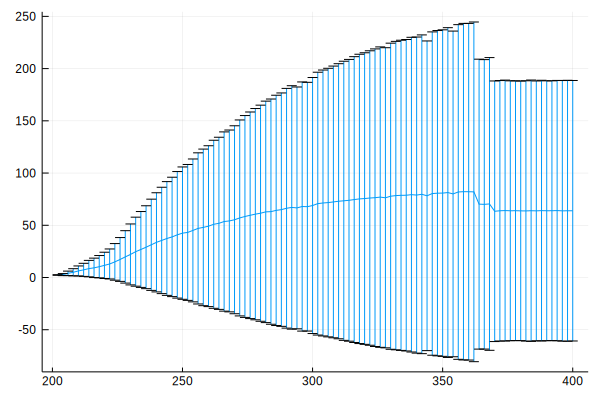

In [7]:
lor = Systems.lorenz(ρ=69.75)

tr = trajectory(lor, 100.0, dt = 0.005, Ttr = 0.0)
x, y, z = columns(tr)

l_gen, l_isinside = boxregion(map(minimum, [x,y,z]), map(maximum, [x,y,z]))

@time times, meanlist, stdlist = expansionentropy_graph(lor, l_gen, l_isinside; batchcount=100, samplecount=100, steps=100, dT=2.0, Ttr=200)
plot(times, meanlist, yerr=stdlist, leg=false)